<font face="黑体" size=5>月度产销差漏损率分析报告图表</font> 

***author: 谢杰***<br/>

In [1]:
%load_ext rpy2.ipython

D:\ProgramData\Anaconda3\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [2]:
%%R 
Sys.setlocale('LC_ALL', locale = "English_United States.1252") #字符编码由GBk改成utf-8
library(ggplot2) 
library(reshape2)

In [4]:
%%R 

data <- read.csv(file="C://Users//Jay//mypyworks//dumbbell.csv",header = T,check.names=F)
data

     gene control patient
1   gene1       5       6
2   gene2       4       7
3   gene3       8       2
4   gene4       3       1
5   gene5       6       3
6   gene6       7       9
7   gene7       8       7
8   gene8       6       8
9   gene9       2       5
10 gene10       3       7


In [5]:
%%R 
# 注释：将原始的宽数据变成长数据，方便画图
data_melt <- melt(data,id.vars = "gene")
data_melt

     gene variable value
1   gene1  control     5
2   gene2  control     4
3   gene3  control     8
4   gene4  control     3
5   gene5  control     6
6   gene6  control     7
7   gene7  control     8
8   gene8  control     6
9   gene9  control     2
10 gene10  control     3
11  gene1  patient     6
12  gene2  patient     7
13  gene3  patient     2
14  gene4  patient     1
15  gene5  patient     3
16  gene6  patient     9
17  gene7  patient     7
18  gene8  patient     8
19  gene9  patient     5
20 gene10  patient     7


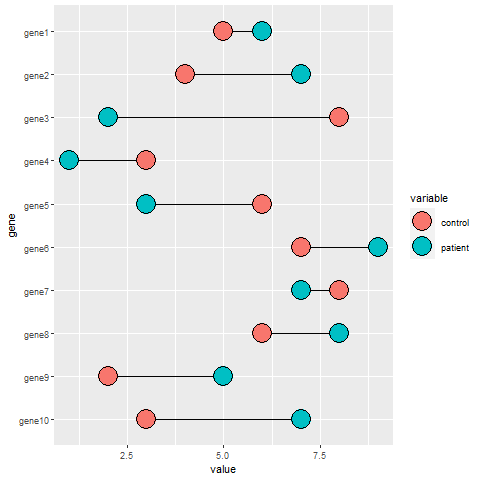

In [48]:
%%R 
order <- c("gene1","gene2","gene3","gene4","gene5","gene6","gene7","gene8","gene9","gene10")
order <- rev(order)
p <- ggplot(data_melt,aes(x=value , y= gene)) +  
  geom_line(aes(group = gene)) +
  geom_point(aes(fill=variable), shape = 21, size = 9) +
  scale_y_discrete(limits = order)
p

In [26]:
%R -o data_melt

In [28]:
#调入常用包
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
mpl.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt
import sys
import os
#查看当前目录
os.getcwd()

'C:\\Users\\Jay\\mypyworks\\jupyter文件'

In [ ]:
penguins = sns.load_dataset("penguins")
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()


In [ ]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

In [ ]:
import pyecharts
print(pyecharts.__version__)
#水量平衡表旭日图
from pyecharts.charts import Sunburst
from pyecharts import options as opts

In [ ]:
data = [
    opts.SunburstItem(
        name="注册用水量",                                #第1层级
        children=[
            opts.SunburstItem(                       #1.1层级
                name="计费用水",                
                children=[
                    opts.SunburstItem(name="计量用水", value=1187494203),#1.1.1层级
                    opts.SunburstItem(name="未计量用水",value=53351685)
                    
                ],
            ),
            opts.SunburstItem(
                name="免费用水", #1.2层级               
                children=[
                    opts.SunburstItem(name="计量", value=0),
                    opts.SunburstItem(name="未计量", value=118913235),
                ],
            ),
        ],
    ),
    opts.SunburstItem(
        name="漏损水量",                                                  #第2层级
        children=[
            opts.SunburstItem(
                name="漏失",
                children=[
                    opts.SunburstItem(name="明漏", value=0),
                    opts.SunburstItem(name="暗漏", 
                                     children=[
                                        opts.SunburstItem(name="主动检出暗漏点", value=0),#1.1.1层级
                                        opts.SunburstItem(name="其它",value=174714223.66)
                                     ]                    
                                     ),
                    opts.SunburstItem(name="水箱、水池的\n渗漏和溢流", value=0),
                ],
            ),
            opts.SunburstItem(
                name="计量",
                children=[
                    opts.SunburstItem(name="总分表差", value=43661780),
                    opts.SunburstItem(name="表具误差", value=8504039.48),
                ],
            ),
            opts.SunburstItem(
                name="其他",
                children=[                    
                    opts.SunburstItem(name="未注册用户和用户拒查", value=17681498.86),
                ],
            )
        ],
    ),
]
sunburst = (
    Sunburst(init_opts=opts.InitOpts(width="1000px", height="600px"))
    .add(series_name="", data_pair=data, radius=['10%', "95%"],
        highlight_policy="descendant",
        sort_="null",
        levels=[
            {},
            {"itemStyle": {"borderWidth": 2},"label": {"rotate": "tangential"}, },
            {},
            { "label": { "padding": 1, "silent": False}, "label": {"align": "left"},
                "itemStyle": {"borderWidth": 2},
            },
            { "label": { "padding": 1, "silent": False},
                "itemStyle": {"borderWidth": 2},
            }
        ],)
    .set_global_opts(title_opts=opts.TitleOpts(title="水量平衡表细项比例示意图"))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}"))
    
)
sunburst.render_notebook()

In [ ]:
data = [
    {
        "name": "注册用水量",        
        "children": [
            {"name": "计费用水",
                 "children": [                    
                        {"name": "计量用水", "value": 1187494203, "percent":35},
                        {"name": "未计量用水", "value": 53351685, },
                    ],
            },
            { "name": "免费用水", "itemStyle": {"color": "#794752"},             
                "children": [                    
                    {"name": "计量", "value": 0,"itemStyle": {"color": "#794752"}, },
                    {"name": "未计量", "value": 118913235,"itemStyle": {"color": "#794752"},},
                ],
            },
        ],
    },
    {
        "name": "漏损水量",        
        "children": [
            {
                "name": "漏失",               
                "children": [
                    {
                        "name": "明漏",
                        "value": 0,                       
                    },
                    {
                        "name": "暗漏",
                             "children": [                    
                                {"name": "主动检出暗漏点", "value": 0, },
                                {"name": "其它", "value": 174714223.66, },
                            ],
                       
                    },
                    {
                        "name": "水箱、水池的\n渗漏和溢流",
                        "value": 0,                        
                    },                    
                ],
            },
            {
                "name": "计量误差",                
                "children": [
                    {"name": "总分表差", "value": 43661780},
                    {"name": "表具误差", "value": 8504039.48,},
                ],
            },
            {
                "name": "其他",               
                "children": [
                    {"name": "未注册用户和用户拒查", "value": 17681498.86, },
                    
                ],
            },            
        ],
    },
    
]

sunburst = (
    Sunburst(init_opts=opts.InitOpts(width="600px", height="600px",bg_color='white'))
    .add(series_name="", data_pair=data, radius=['10%', "95%"],
        highlight_policy="descendant",
        sort_="null",
        levels=[
            {},
            {"itemStyle": {"borderWidth": 2},"label": {"rotate": "tangential"}, },
            {},
            { "label": { "padding": 1, "silent": False}, "label": {"align": "left"},
                "itemStyle": {"borderWidth": 2},
            },
            { "label": { "padding": 1, "silent": False},
                "itemStyle": {"borderWidth": 2},
            }
        ],)
    .set_global_opts(title_opts=opts.TitleOpts(title="水量平衡表细项比例示意图",pos_left='left',),
                     toolbox_opts=opts.ToolboxOpts(
                     feature = opts.ToolBoxFeatureOpts(
                     save_as_image = opts.ToolBoxFeatureSaveAsImageOpts(),),
                     ),)
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}"))
    
    
)
sunburst.render_notebook()

In [58]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.commons.utils import JsCode
# 内置主题类型可查看 pyecharts.globals.ThemeType
from pyecharts.globals import ThemeType
danwei=['荔湾西片(中区)','体育中心片(东区)','员村片(东区)','芳村东片(南区)','芳村西片(南区)','机场广园片(北区)']
jihua=[36.53,18.40,17.74,40.41,39.15,28.89]
wancheng=[31.99,18.01,18.06,39.27,40.37,32.45]
tongqi = [34.53,17.80,18.71,38.66,34.93,26.33]
c = (
    Bar(init_opts=opts.InitOpts(width="1000px", height="600px",bg_color='white'))#theme=ThemeType.white,
    .add_xaxis(danwei)
    .add_yaxis("计划",jihua,
               itemstyle_opts=opts.ItemStyleOpts(color='#339999'),
              label_opts=opts.LabelOpts(position='inside'))
    .add_yaxis("完成",wancheng,
               itemstyle_opts=opts.ItemStyleOpts(color='#339933'),
               label_opts=opts.LabelOpts(position='inside',color='#333333'),               
               stack="stack1")#
    .add_yaxis("同期",[-x for x in tongqi],itemstyle_opts=opts.ItemStyleOpts(color='#FF9900'),stack="stack1",
               label_opts=opts.LabelOpts(formatter=JsCode(
                                            """function(params) {
                                             return Math.abs(params.data).toFixed(2);
                                            }
                                        """ ),
                                         position='left',color='#333333'
                                              )) 
    .set_global_opts(toolbox_opts=opts.ToolboxOpts(
                     feature = opts.ToolBoxFeatureOpts(
                     save_as_image = opts.ToolBoxFeatureSaveAsImageOpts('jpeg'),),
                     ),
                    xaxis_opts=opts.AxisOpts(type_='value',interval=10,
                                             splitline_opts=opts.SplitLineOpts(is_show=True),axislabel_opts=opts.LabelOpts(formatter=JsCode(
                    """function(params){
                    return Math.abs(params);
                    }                    
                    """ ))),
                     yaxis_opts=opts.AxisOpts(type_='category',axistick_opts=opts.AxisTickOpts(is_show=False))
                    )
    .reversal_axis()
)
c.render_notebook()

In [ ]:
zone2 = pd.read_excel(r'e:\专题工作（重要）\产销差工作\产销差数据与资料积累\产销差分析周月报图表.xlsx',sheet_name=2)
zone2=zone2[np.isfinite(zone2['综合产销差'])==1].sort_values('综合产销差',ascending=True)

In [ ]:
zone2

In [ ]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.commons.utils import JsCode
"""
y = []
for idx, item in enumerate(x):
    if idx <= xlen / 2:
        y.append(
            opts.BarItem(
                name=item,
                value=(idx + 1) * 10,
                itemstyle_opts=opts.ItemStyleOpts(color="#749f83"),
            )
        )
    else:
        y.append(
            opts.BarItem(
                name=item,
                value=(xlen + 1 - idx) * 10,
                itemstyle_opts=opts.ItemStyleOpts(color="#d48265"),
            )
        )
"""


x=list(zone2['编号'])
y=[dict(value=x,itemStyle=dict(color=y)) for x,y in zip(zone2['综合产销差'],zone2['分公司颜色'])]
c = (
    Bar(init_opts=opts.InitOpts(width="800px", height="600px",bg_color='white'))
    .add_xaxis(x)
    .add_yaxis("",y,               
              #markpoint_opts=opts.MarkPointOpts(data=[
                  #opts.MarkPointItem(name="重点片区", coord=['荔湾西片',y[x.index('荔湾西片')]['value'] ], value='重'),
                  #opts.MarkPointItem(name="重点片区", coord=['体育中心片',y[x.index('体育中心片')]['value'] ], value='重'),
                  #opts.MarkPointItem(name="重点片区", coord=['员村片',y[x.index('员村片')]['value'] ], value='重'),
                  #opts.MarkPointItem(name="重点片区", coord=['芳村东片',y[x.index('芳村东片')]['value'] ], value='重'),
                  #opts.MarkPointItem(name="重点片区", coord=['芳村西片',y[x.index('芳村西片')]['value'] ], value='重'),
                  #opts.MarkPointItem(name="重点片区", coord=['机场广园片',y[x.index('机场广园片')]['value'] ], value='重'),]),
              )  
    .reversal_axis()
    .set_global_opts(title_opts=opts.TitleOpts(title="累计2月二级分区产销差排名",pos_left='center',),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=0)),
                     toolbox_opts=opts.ToolboxOpts(
                     feature = opts.ToolBoxFeatureOpts(
                     save_as_image = opts.ToolBoxFeatureSaveAsImageOpts('jpeg'),),
                     ),)
    .set_series_opts(label_opts=opts.LabelOpts(formatter=JsCode(  
                                            """function(params) {
                                             return params.data.value.toFixed(2) 
                                            }
                                        """ ),
                                               position="right",
                                               color="black",
                                              ),
                    )
)
    

c.render_notebook()

In [ ]:
#分公司分布图
zone3 = pd.read_excel(r'e:\专题工作（重要）\产销差工作\产销差数据与资料积累\产销差分析周月报图表.xlsx',sheet_name=6)
zone3 = zone3.query("月份 in ['2月','3月']") 
zone3

In [ ]:
#f, axes = plt.subplots(2,2, figsize=(6, 4),sharex=True)
#sns.kdeplot(data=zone3 , x="累计产销差率", hue="月份",ax=axes[0,1])#类别画图函数可以分面。专项绘图函数不行。
#sns.despine(left=True) #移除边框

fig=plt.figure(figsize=(8,6),dpi=100)
#fig.suptitle("我是画布的标题",fontsize=20)
g=sns.histplot(data=zone3 , x="累计产销差率", bins=[-20,-10,0,10,20,30,40,50],hue="月份",multiple='dodge',shrink=.8,kde=True)
sns.despine() #移除边框
plt.xticks([-16,-6,4,14,24,34,44],labels=['-10以下','-10~0','0~10','10~20','20~30','30~40','40以上'])
plt.ylabel('二级分区数量')
plt.xlabel('累计产销差率（%）')
#plt.title('测试')
#g=sns.displot(data=zone3 , x="累计产销差率", hue="月份",kind="kde",height=5,aspect=1.5)#必须用细项函数才可以写到axes里面,一个图不加ax索引，单行列图只加一个索引。
#g.set_axis_labels('累计产销差率','二级分区数量密度')
#g.legend.set_title("")


In [ ]:
#g = sns.FacetGrid(zone3,col="分公司",hue="月份", height=10)
#g.map(sns.kdeplot, "累计产销差率")
#g=sns.displot(data=zone3 , x="累计产销差率", hue="月份",col="分公司" ,kind="kde",col_wrap=2)
#g.set_axis_labels('累计产销差率','二级分区数量密度')
#g.set(ylabel='二级分区集中度')

f, axes = plt.subplots(2,2, figsize=(12, 10),dpi=100)
ax1,ax2,ax3,ax4=axes.flatten()
bins=[-20,-10,0,10,20,30,40,50]
xticks=[-16,-6,4,14,24,34,44]
xlabel=['-10以下','-10~0','0~10','10~20','20~30','30~40','40以上']

sns.histplot(data=zone3.query("分公司 == '中区'") , x="累计产销差率", bins=bins,
             hue="月份",multiple='dodge',shrink=.8,kde=True,ax=ax1)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xlabel)
ax1.set_xlabel('')
ax1.set_ylabel('二级分区数量')
ax1.set_title('中区')

sns.histplot(data=zone3.query("分公司 == '东区'") , x="累计产销差率", bins=bins,
             hue="月份",multiple='dodge',shrink=.8,kde=True,ax=ax2)
ax2.set_xticks(xticks)
ax2.set_xticklabels(xlabel)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('东区')

sns.histplot(data=zone3.query("分公司 == '南区'") , x="累计产销差率", bins=bins,
             hue="月份",multiple='dodge',shrink=.8,kde=True,ax=ax3)
ax3.set_xticks(xticks)
ax3.set_xticklabels(xlabel)
ax3.set_xlabel('累计产销差（%）')
ax3.set_ylabel('二级分区数量')
ax3.set_title('南区')

sns.histplot(data=zone3.query("分公司 == '北区'") , x="累计产销差率", bins=bins,
             hue="月份",multiple='dodge',shrink=.8,kde=True,ax=ax4)
ax4.set_xticks(xticks)
ax4.set_xticklabels(xlabel)
ax4.set_xlabel('累计产销差（%）')
ax4.set_ylabel('')
ax4.set_title('北区')

sns.despine() #移除边框
f.tight_layout()

In [ ]:
#中东南北贡献度饼图
fig, ax = plt.subplots(figsize=(8,6), subplot_kw=dict(aspect="equal"))

recipe = ["0.17 百分点 中区",
          "1.06 百分点 东区",
          "0.21 百分点 南区",
          "1.04 百分点 北区"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

In [ ]:
#完成计划
sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

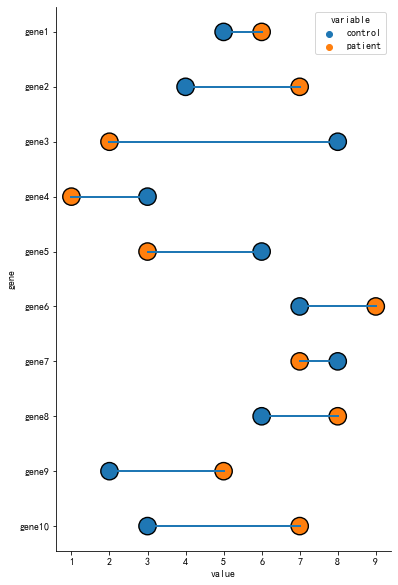

In [47]:
f, ax = plt.subplots(figsize=(6,10))


# Plot the total crashes
#sns.set_color_codes("pastel")
sns.lineplot(x="value", y="gene", data=data_melt,
            units="gene",estimator=None, lw=2)
sns.scatterplot(x="value", y="gene", data=data_melt,
            hue='variable',marker = "o",s=300,edgecolor='black')
sns.despine()

In [27]:
# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

,gene,variable,value
1,gene1,control,5
2,gene2,control,4
3,gene3,control,8
4,gene4,control,3
5,gene5,control,6
6,gene6,control,7
7,gene7,control,8
8,gene8,control,6
9,gene9,control,2
10,gene10,control,3
